# Sampling Assignment:
## Step1: All the important libraries

In [2]:
!pip install xgboost

In [3]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer,accuracy_score, balanced_accuracy_score, confusion_matrix, f1_score, precision_score, average_precision_score,  recall_score

## Step 2: Reading the data

In [5]:
data = pd.read_csv("C:/Users/yashp/Downloads/Creditcard_data.csv")

## Step 3: Exploring the data we have:

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.shape
data.Class.value_counts()

0    763
1      9
Name: Class, dtype: int64

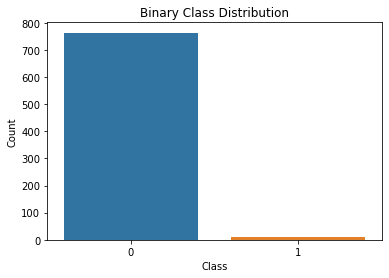

In [8]:
sns.countplot(x="Class", data=data)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Binary Class Distribution')

plt.show()

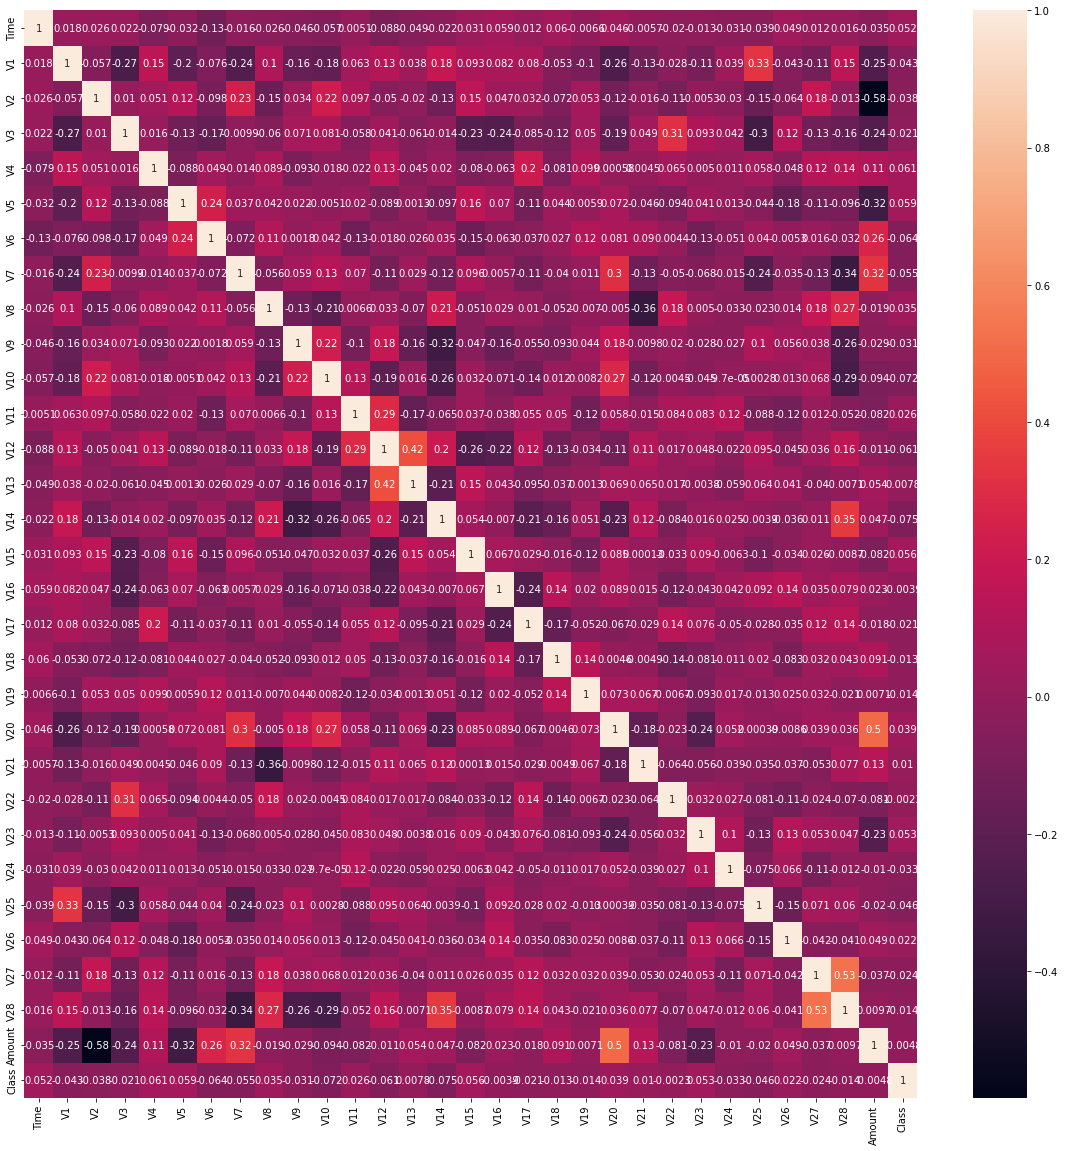

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

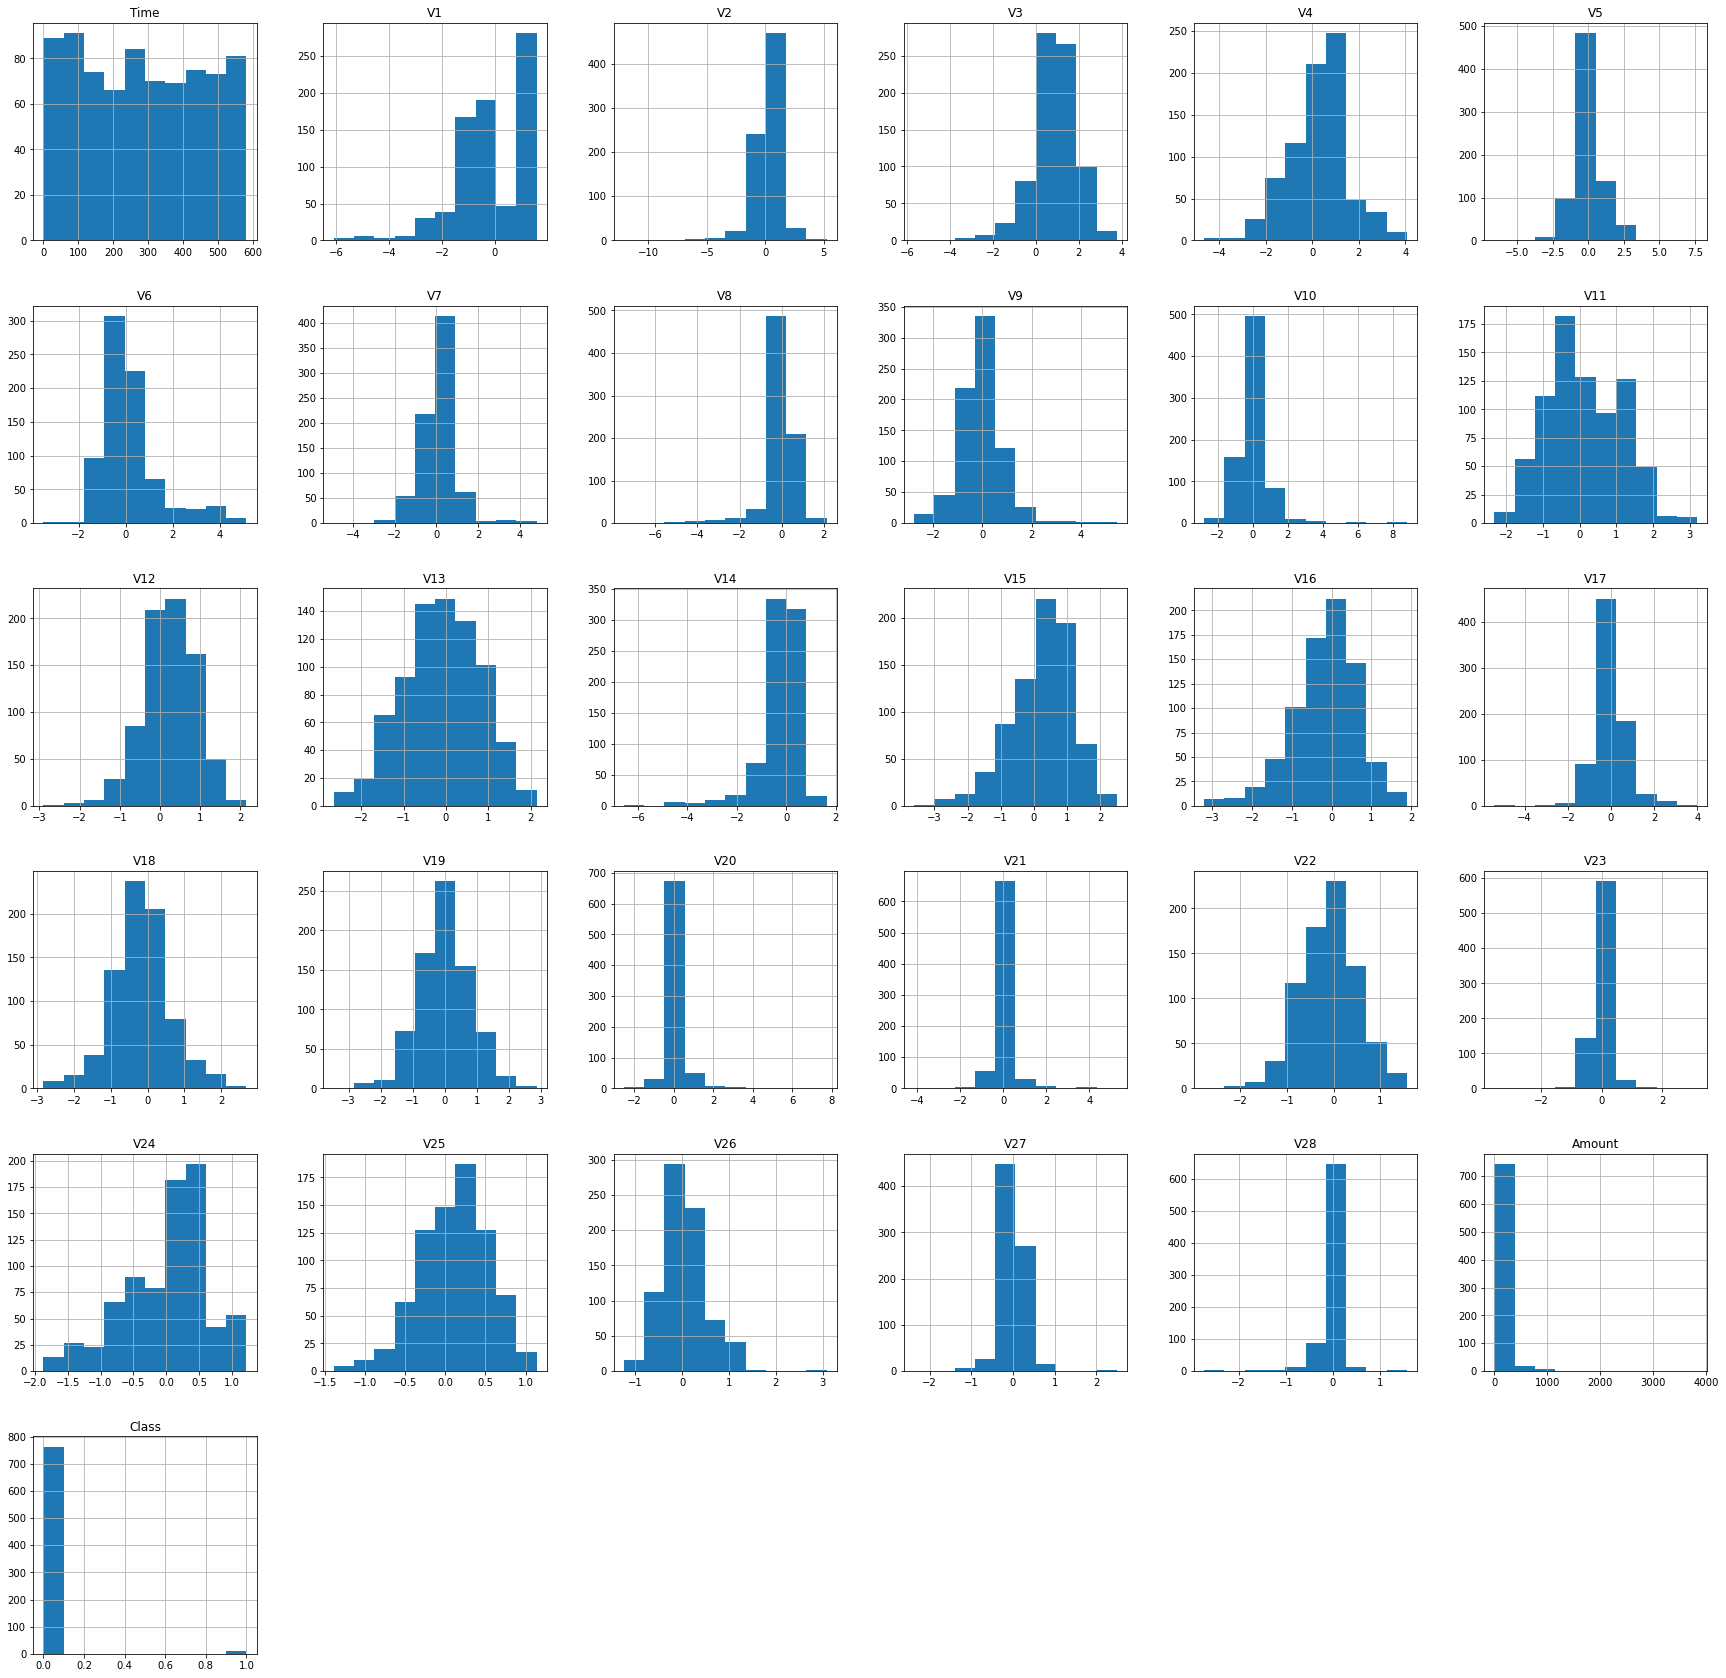

In [10]:
data.hist(figsize=(30,30))

## Step 4: Creating the samples

In [11]:
x = data.iloc[:,1:29]

In [12]:
y = data.iloc[:,-1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
train_dist = y_train.value_counts(normalize=True)
test_dist = y_test.value_counts(normalize=True)

print("Training set class distribution:\n", train_dist)
print("Testing set class distribution:\n", test_dist)

Training set class distribution:
 0    0.988655
1    0.011345
Name: Class, dtype: float64
Testing set class distribution:
 0    0.987097
1    0.012903
Name: Class, dtype: float64


In [15]:
print(X_train.shape)
print(y_train.shape)

(617, 28)
(617,)


## Technique I - Random Oversampling

In [16]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

sample_size = len(X_train_resampled) // 5
samples = []
for i in range(5):
    sample_indices = np.random.choice(len(X_train_resampled), sample_size, replace=True)
    X_sample = X_train_resampled.iloc[sample_indices, :]
    y_sample = y_train_resampled.iloc[sample_indices]
    samples.append((X_sample, y_sample))

In [27]:
samples

[(            V1        V2        V3        V4        V5        V6        V7  \
  1044 -1.277556 -1.729867  0.704034  1.521236  0.817848 -0.655177  0.156966   
  709  -1.793561  0.234766  0.918998 -0.210554  0.782342 -0.400545  0.000107   
  1180 -2.060769 -1.988103  0.887758  1.603303  1.190539 -0.649805  0.316350   
  374   0.158332  0.872687  0.965525  1.802127  0.139022  0.110863  0.559079   
  836   0.794893  0.428454  0.360662  0.467994  0.093612 -0.555598  0.168371   
  ...        ...       ...       ...       ...       ...       ...       ...   
  795  -0.821793 -0.764025  1.321796  0.557453  1.530464  0.399445 -0.742471   
  41    1.422461 -0.547422 -0.147438 -0.615979 -0.677018 -0.825597 -0.295487   
  365   1.145614  0.004148  0.772422  0.916543 -0.568699 -0.281603 -0.161752   
  1216 -1.231751 -1.692844  0.694063  1.501332  0.803791 -0.644552  0.152593   
  260  -1.013287  0.512380  0.837259  0.408468  2.078535  4.692662 -0.294088   
  
              V8        V9       V10 

In [17]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

models = [AdaBoostClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), XGBClassifier()]
for i, (X_sample, y_sample) in enumerate(samples):
    print(f"Sample {i+1}:")
    for model in models:
        print(f"\t{model.__class__.__name__}:")
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred, zero_division=1))

Sample 1:
	AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.50      0.50      0.50         2

    accuracy                           0.99       155
   macro avg       0.75      0.75      0.75       155
weighted avg       0.99      0.99      0.99       155

	RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.33      0.50      0.40         2

    accuracy                           0.98       155
   macro avg       0.66      0.74      0.70       155
weighted avg       0.98      0.98      0.98       155

	ExtraTreesClassifier:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       153
           1       1.00      0.50      0.67         2

    accuracy                           0.99       155
   macro avg       1.00      0.75      0.83      

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.33      0.50      0.40         2

    accuracy                           0.98       155
   macro avg       0.66      0.74      0.70       155
weighted avg       0.98      0.98      0.98       155



## Technique II - Random Undersampling

In [18]:
from imblearn.under_sampling import RandomUnderSampler

oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

sample_size = len(X_train_resampled) // 5
samples = []
for i in range(5):
    sample_indices = np.random.choice(len(X_train_resampled), sample_size, replace=True)
    X_sample = X_train_resampled.iloc[sample_indices, :]
    y_sample = y_train_resampled.iloc[sample_indices]
    samples.append((X_sample, y_sample))

In [19]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

models = [AdaBoostClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), XGBClassifier()]
for i, (X_sample, y_sample) in enumerate(samples):
    print(f"Sample {i+1}:")
    for model in models:
        print(f"\t{model.__class__.__name__}:")
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred, zero_division=1))

Sample 1:
	AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.33      0.50      0.40         2

    accuracy                           0.98       155
   macro avg       0.66      0.74      0.70       155
weighted avg       0.98      0.98      0.98       155

	RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.50      0.50      0.50         2

    accuracy                           0.99       155
   macro avg       0.75      0.75      0.75       155
weighted avg       0.99      0.99      0.99       155

	ExtraTreesClassifier:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       153
           1       1.00      0.50      0.67         2

    accuracy                           0.99       155
   macro avg       1.00      0.75      0.83      

## Technique III - Combined sampling(SMOTE)

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

sample_size = len(X_train) // 5
samples = []
for i in range(5):
    sample_indices = np.random.choice(len(X_train_resampled), sample_size, replace=True)
    X_sample = X_train_resampled.iloc[sample_indices, :]
    y_sample = y_train_resampled.iloc[sample_indices]
    samples.append((X_sample, y_sample))

In [21]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

models = [AdaBoostClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), XGBClassifier()]
for i, (X_sample, y_sample) in enumerate(samples):
    print(f"Sample {i+1}:")
    for model in models:
        print(f"\t{model.__class__.__name__}:")
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred, zero_division=1))

Sample 1:
	AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       153
           1       0.00      0.00      0.00         2

    accuracy                           0.90       155
   macro avg       0.49      0.45      0.47       155
weighted avg       0.97      0.90      0.93       155

	RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       153
           1       0.17      0.50      0.25         2

    accuracy                           0.96       155
   macro avg       0.58      0.73      0.62       155
weighted avg       0.98      0.96      0.97       155

	ExtraTreesClassifier:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       153
           1       0.25      0.50      0.33         2

    accuracy                           0.97       155
   macro avg       0.62      0.74      0.66      

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       153
           1       0.12      0.50      0.20         2

    accuracy                           0.95       155
   macro avg       0.56      0.73      0.59       155
weighted avg       0.98      0.95      0.96       155



## Technique IV - ADASYN sampling

In [22]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)

X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

sample_size = len(X_train) // 5
samples = []
for i in range(5):
    sample_indices = np.random.choice(len(X_train_resampled), sample_size, replace=True)
    X_sample = X_train_resampled.iloc[sample_indices, :]
    y_sample = y_train_resampled.iloc[sample_indices]
    samples.append((X_sample, y_sample))

In [23]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

models = [AdaBoostClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), XGBClassifier()]
for i, (X_sample, y_sample) in enumerate(samples):
    print(f"Sample {i+1}:")
    for model in models:
        print(f"\t{model.__class__.__name__}:")
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred, zero_division=1))

Sample 1:
	AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       153
           1       0.00      0.00      0.00         2

    accuracy                           0.95       155
   macro avg       0.49      0.48      0.49       155
weighted avg       0.97      0.95      0.96       155

	RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.00      0.00      0.00         2

    accuracy                           0.97       155
   macro avg       0.49      0.49      0.49       155
weighted avg       0.97      0.97      0.97       155

	ExtraTreesClassifier:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       153
           1       1.00      0.00      0.00         2

    accuracy                           0.99       155
   macro avg       0.99      0.50      0.50      

## Technique V - EasyEnsembleClassifier

In [24]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import classification_report

eec = EasyEnsembleClassifier(n_estimators=10, random_state=42)

# create 5 samples
sample_size = len(X_train_resampled) // 5
samples = []
for i in range(5):
    sample_indices = np.random.choice(len(X_train_resampled), sample_size, replace=True)
    X_sample = X_train_resampled.iloc[sample_indices, :]
    y_sample = y_train_resampled.iloc[sample_indices]
    samples.append((X_sample, y_sample))

for i, (X_sample, y_sample) in enumerate(samples):
    print(f"Sample {i+1}:")
    eec.fit(X_sample, y_sample)
    y_pred = eec.predict(X_test)
    print(classification_report(y_test, y_pred, zero_division=1))

Sample 1:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       153
           1       0.00      0.00      0.00         2

    accuracy                           0.94       155
   macro avg       0.49      0.48      0.49       155
weighted avg       0.97      0.94      0.96       155

Sample 2:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       153
           1       0.08      0.50      0.14         2

    accuracy                           0.92       155
   macro avg       0.54      0.71      0.55       155
weighted avg       0.98      0.92      0.95       155

Sample 3:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       153
           1       0.00      0.00      0.00         2

    accuracy                           0.97       155
   macro avg       0.49      0.49      0.49       155
weighted avg       0.97      0.97      0.97 